<a href="https://colab.research.google.com/github/yadircubillo61-netizen/Challenge-TelecomX/blob/main/ChallengeTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vision del desafío**

####**Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.**

####**Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.**

#**Transformación**

In [1]:
import pandas as pd
import requests

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

data = requests.get(url).json()

####**Normalizar el archivo json**

In [3]:
df_normalizado = pd.json_normalize(data)
df_normalizado.columns.str.replace('customer.','').str.replace('phone.','').str.replace('internet.','').str.replace('account.','').str.strip()

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [4]:
df_normalizado = df_normalizado.rename(columns=lambda x:x.replace('customer.','').replace('phone.','').replace('internet.','').replace('account.','').strip())

In [5]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


####**Conociendo el conjunto de datos**

**Explorar las columnas y verificar los tipos de datos**

In [6]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df_normalizado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


####**Comprobación de incoherencias en los datos**

**Verificar si hay problemas en los datos que puedan afectar el análisis**

In [8]:
df_normalizado['customerID'].nunique()

7267

In [9]:
df_normalizado['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [10]:
df_normalizado['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [11]:
df_normalizado['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
df_normalizado['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [13]:
df_normalizado['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [15]:
df_normalizado['Charges.Total'].fillna(0,inplace=True)

/tmp/ipython-input-386760126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['Charges.Total'].fillna(0,inplace=True)


####**Manejo de inconsistencias**

**Cambiaré el tipo de dato de la columna (Charges.Total) de tipo (object) a tipo (float) ya que esta columna es una columna numerica y estas columnas deben ser de tipo numérica.**

In [16]:
df_normalizado['Charges.Total'] = (df_normalizado['Charges.Total'].astype(str).str.replace(',','.').str.strip())

df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'],errors='coerce')

In [17]:
df_normalizado['Charges.Total'].dtype

dtype('float64')

In [18]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


####**Columna de cuetas diarias**

**Crear una columna (cuentas_diarias) utilizadndo la facturación mensual para calcular el valor diario**

In [19]:
df_normalizado['cuentas_diarias'] = df_normalizado['Charges.Monthly'] / 30
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


####**Estandarización y transformación de datos**

**Convertir los valores textuales como 'Yes y No' en valores binarios (1 y 0) para facilitar el procesamiento matematico y la aplicación de modelos analiticos.**

In [20]:
mapa = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0,
    '': 0}

In [21]:
columnas = ['OnlineBackup','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','MultipleLines','PhoneService','Dependents','Partner','Churn','OnlineSecurity']

In [22]:
len(columnas)

12

In [23]:
df_copia = df_normalizado.copy()

In [24]:
df_copia[columnas] = df_copia[columnas].replace(mapa)
df_copia


/tmp/ipython-input-4201224129.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copia[columnas] = df_copia[columnas].replace(mapa)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


**Tambien transformaremos los tipos de datos de estas columnas de tipo (object) a tipo numerico,ya que dejaron de ser texto y ahora son número.**

In [25]:
df_copia[columnas] = (df_copia[columnas].replace(mapa).fillna(0).astype(int))

In [26]:
df_copia['OnlineBackup'].unique()

array([1, 0])

In [27]:
df_copia['OnlineSecurity'].unique()

array([0, 1])

In [28]:
df_copia['StreamingTV'].unique()

array([1, 0])

In [29]:
df_copia['TechSupport'].unique()

array([1, 0])

In [30]:
df_copia['DeviceProtection'].unique()

array([0, 1])

In [31]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


#**Carga y Analisis(Load & analysis)**

####**Analisis descriptivo**

**Realizar un analisis descriptivo de los datos y calcular métricas como (media,mediana,desviación estandar) y otras medidas que ayudan a entender mejor la distribución y el comportameinto de los clientes.**

In [32]:
df_copia.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [33]:
df_copia

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


####**Distrubución de evación**

**Comprender como esta distribuida la variable 'churn'(evasion)  entre los clientes.**

In [34]:
import matplotlib.pyplot as plt

In [35]:
df_copia['Churn'].dtype

dtype('int64')

In [36]:
df_copia['Churn'].describe()

,Churn
count,7267.000000
mean,0.257190
std,0.437115
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [37]:
df_copia['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


In [38]:
df_copia['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.74281
1,0.25719


##**Gráficos**

In [39]:
#Conteo de clientes por categoría
conteo_churn = df_copia['Churn'].value_counts().sort_index()

#Remombrar el indice
conteo_churn.index = ['No evadieron','evadieron']




In [40]:
conteo_churn

,count
No evadieron,5398
evadieron,1869


**Gráfico de distribución de la evasion entre los clientes**

<Axes: title={'center': 'Evacion de clientes'}, xlabel='Número de clientes', ylabel='Churn'>

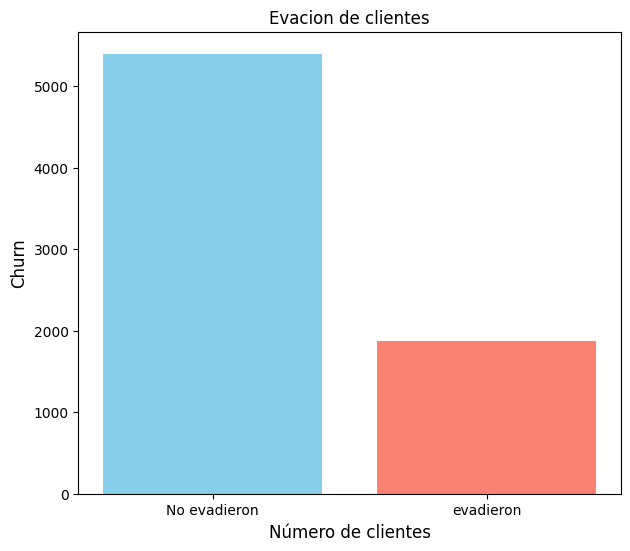

In [41]:
colores = ['skyblue','salmon']
fig,ax = plt.subplots(figsize=(7,6))

bars = ax.bar(conteo_churn.index,conteo_churn,color=colores)

ax.set_title('Evacion de clientes',fontsize=12)
ax.set_xlabel('Número de clientes',fontsize=12)
ax.set_ylabel('Churn',fontsize=12)

ax

**distribucion de evacion de clientes**

**El analisis de la columna (churn) muestra que la distribución es del 25% lo que indica que una cuarta parte de los clientes abandonaron la empresa,el gráfico de barras evidencia una mayor proporción de clientes que no evadieron en comparación con los que si lo hicieron,lo cual sugiere que,aunque la gran mayoría de los clientes se mantiene,la evación representa un problema relevante para el negocio.**

####**Recuento de evación por variables categóricas**

#####**Explorar como se distribuye la evasion segun distintas variables categoricas**

**1.Distribución de evacion segun la columna de 'gender' (genero)**

In [42]:
churn_por_genero = (df_copia.groupby('gender')['Churn'].mean().sort_values())
churn_por_genero.value_counts(normalize=True)


,proportion
Churn,
0.253061,0.5
0.261414,0.5


###**1er gráfico**
#####**Este gráfico muestra que genero tiende a cancelar sus servicios**

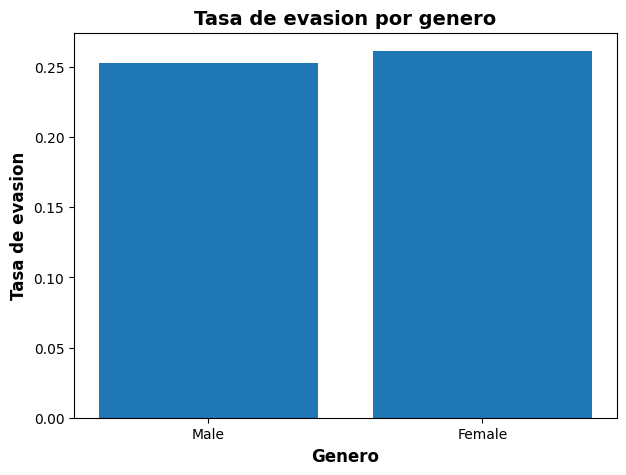

In [43]:
fig,axes = plt.subplots(figsize=(7,5))


axes.bar(churn_por_genero.index,churn_por_genero.values)
axes.set_title('Tasa de evasion por genero',fontsize=14,fontweight='bold')
axes.set_xlabel('Genero',fontsize=12,fontweight='bold')
axes.set_ylabel('Tasa de evasion',fontsize=12,fontweight='bold')



plt.show()



**Distribución de evación por género**

**La distribución de evaisón por género muestra que el género femenino presenta  una mayor número de clientes que evaden y que ala vez el género masculino esta casi al mismo nivel.**


**2.Distribuciòn de evacion segun la columnas (contract) contrato**

In [44]:
churn_por_contrato = (df_copia.groupby('Contract')['Churn'].mean().sort_values())
churn_por_contrato

,Churn
Contract,
Two year,0.027539
One year,0.109282
Month-to-month,0.413233


In [45]:
churn_por_contrato.value_counts(normalize=True)

,proportion
Churn,
0.027539,0.333333
0.109282,0.333333
0.413233,0.333333


**2do gráfico**

#####**Este gráfico mostrará que clientes con un tipo de contrato específico tienden a cancelar sus servicios**

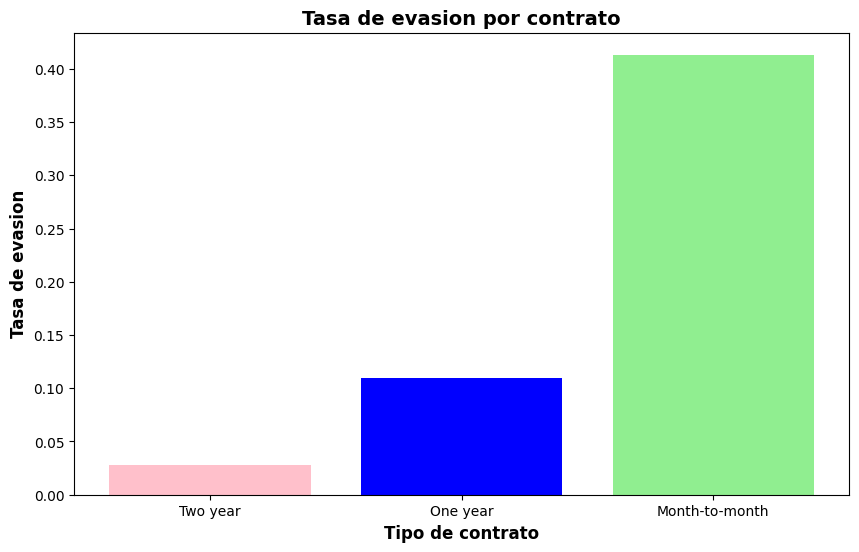

In [46]:
fig,axes = plt.subplots(figsize=(10,6))

axes.bar(churn_por_contrato.index,churn_por_contrato.values,color=['pink','blue','lightgreen'])
axes.set_title('Tasa de evasion por contrato',fontsize=14,fontweight='bold')
axes.set_xlabel('Tipo de contrato',fontsize=12,fontweight='bold')
axes.set_ylabel('Tasa de evasion',fontsize=12,fontweight='bold')
plt.show()







#####**Tercer analisis**

#####**Este gráfico muestra una  proporcion de clientes de tipo de contraro:(Month-to-month) que mas tiende a cancelar los cervicios de la empresa a comparación de los otros 2 tipos de contratos de clientes que presentan una menor evacion.**

**3.Distribución de evasion segun la variable (PaymentMethod) metodo de pago**

In [47]:
churn_metodo_pago = (df_copia.groupby('PaymentMethod')['Churn'].mean().sort_values())
churn_metodo_pago

,Churn
PaymentMethod,
Credit card (automatic),0.147959
Bank transfer (automatic),0.162366
Mailed check,0.184985
Electronic check,0.438037


**3er gráfico**

#####**Este gráfico mostrará que clientes con un método de pago tienden a evadir mas los servicios de la empresa**

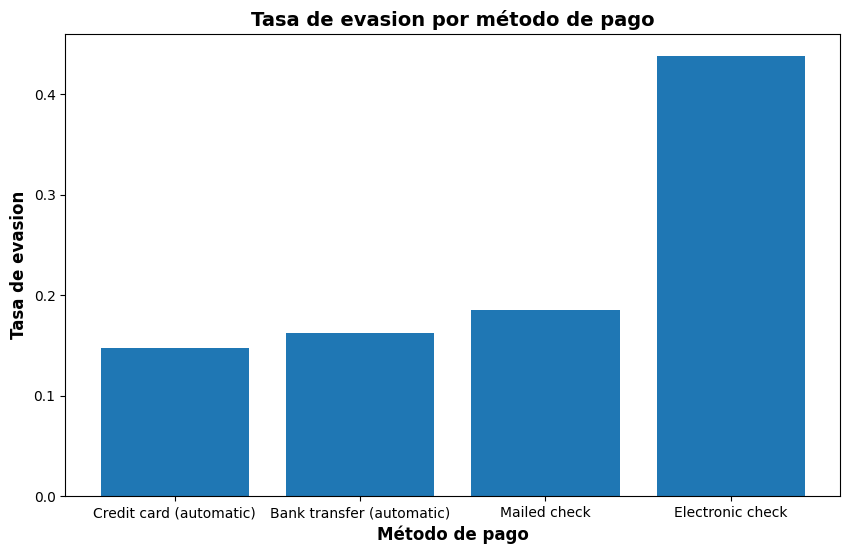

In [48]:
fig,axes = plt.subplots(figsize=(10,6))

axes.set_title('Tasa de evasion por método de pago',fontsize=14,fontweight='bold')
axes.bar(churn_metodo_pago.index,churn_metodo_pago.values)
axes.set_xlabel('Método de pago',fontsize=12,fontweight='bold')
axes.set_ylabel('Tasa de evasion',fontsize=12,fontweight='bold')
plt.show()

#####**Tercer  analisis**
**Este gráfico muestra que los clientes con  el método de pago(Electronic check)  tienen mayor tendencia a cancelar los servicios de la empresa.**

**4.Distribución de evacion segun el rango de edad del cliente de la variable (SeniorCitizen)**

In [49]:
churn_senior = (df_copia.groupby('SeniorCitizen')['Churn'].mean().sort_values())
churn_senior

,Churn
SeniorCitizen,
0,0.228924
1,0.402707


In [50]:
churn_senior.value_counts(normalize=True)

,proportion
Churn,
0.228924,0.5
0.402707,0.5


In [51]:
churn_senior.index = ['Menores de 65 años','Mayores o igual a 65 años']

**4to grafico**

**Este gráfico mostrará que clientes entre jovenes y personas de la tercera edad tienden mas a evadir los servicios de la empresa**

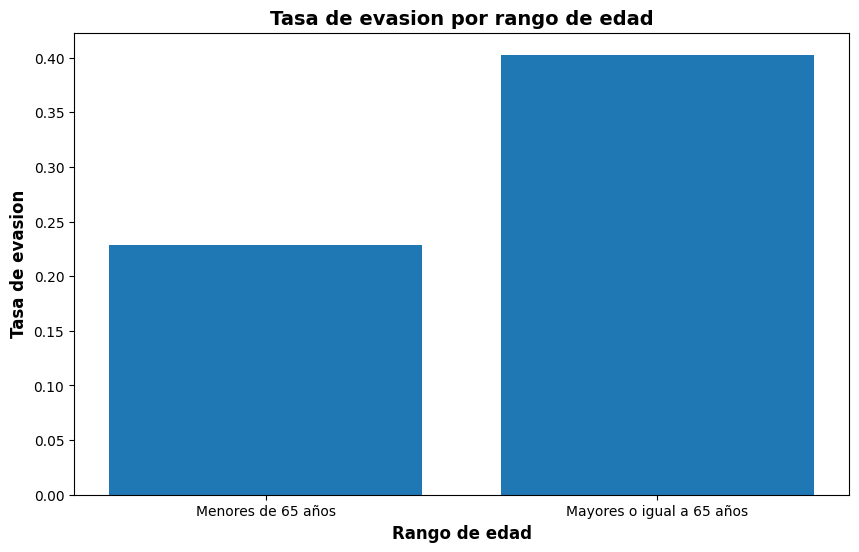

In [52]:
fig,axes = plt.subplots(figsize=(10,6))

axes.bar(churn_senior.index,churn_senior.values)
axes.set_title('Tasa de evasion por rango de edad',fontsize=14,fontweight='bold')
axes.set_xlabel('Rango de edad',fontsize=12,fontweight='bold')
axes.set_ylabel('Tasa de evasion',fontsize=12,fontweight='bold')
plt.show()




#####**Cuarto análisis**

**Este gráfico de barras nos muestra que los clientes con edades de la tercera edad tienden evadir más a comparación a clientes de menor edad,esto nos puede servir para identificar perfiles de clientes y ver si se cumple el mismo patron en analisis futuros,cabe decir que los clientes de ambos perfiles evaden pero los clientes con perfiles mayores tienden a evadir más.**

**5.Distrubucion de evacion segun la variable (partner) pareja**

In [53]:
churn_pareja = (df_copia.groupby('Partner')['Churn'].mean().sort_values())
churn_pareja

,Churn
Partner,
1,0.190165
0,0.320085


In [54]:
churn_pareja.value_counts(normalize=True)

,proportion
Churn,
0.190165,0.5
0.320085,0.5


In [55]:
churn_pareja.index = ['Con pareja','Sin pareja']

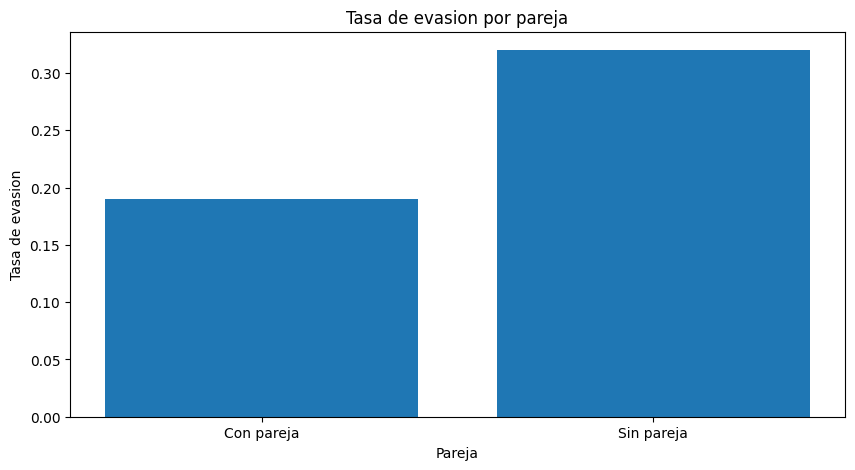

In [56]:
fig,axes = plt.subplots(figsize=(10,5))

axes.bar(churn_pareja.index,churn_pareja.values)
axes.set_title('Tasa de evasion por pareja')
axes.set_xlabel('Pareja')
axes.set_ylabel('Tasa de evasion')
plt.show()




**Quinto analisis**

**Podemos ver en este gráfico de barras que los perfiles de clientes sin pareja tienden a evadir más a comparación con los perfiles de clientes sin parejas,cabe decir que ambos perfiles evaden sin embargo los perfiles sin pareja tienden a evadir con mayor frecuencia**

**6.Distribución de evasion segun la variable (Dependentes)
dependientes**

In [57]:
churn_dependientes = (df_copia.groupby('Dependents')['Churn'].mean().sort_values())
churn_dependientes

,Churn
Dependents,
1,0.149473
0,0.303382


In [58]:
churn_dependientes.value_counts(normalize=True)

,proportion
Churn,
0.149473,0.5
0.303382,0.5


In [59]:
churn_dependientes.index = ['Con dependientes','Sin dependientes']

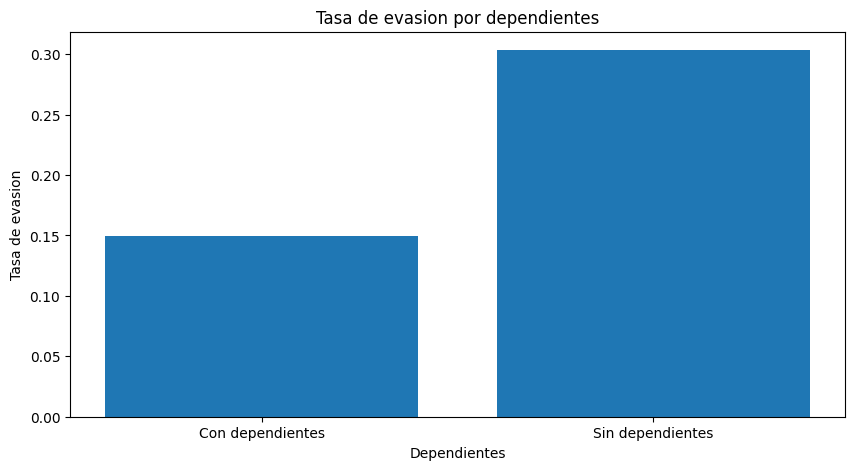

In [60]:
fig,axes = plt.subplots(figsize=(10,5))

axes.bar(churn_dependientes.index,churn_dependientes.values)
axes.set_title('Tasa de evasion por dependientes')
axes.set_xlabel('Dependientes')
axes.set_ylabel('Tasa de evasion')
plt.show()

##**Conteo de evacion por variables numericas**

#####**Estadisticas básicas**

In [64]:
df_copia.groupby('Churn')['Charges.Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5387.0,2540.440867,2330.360507,18.80,568.0,1669.40,4247.825,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.5,703.55,2331.300,8684.80


#####**Gráfico de caja**

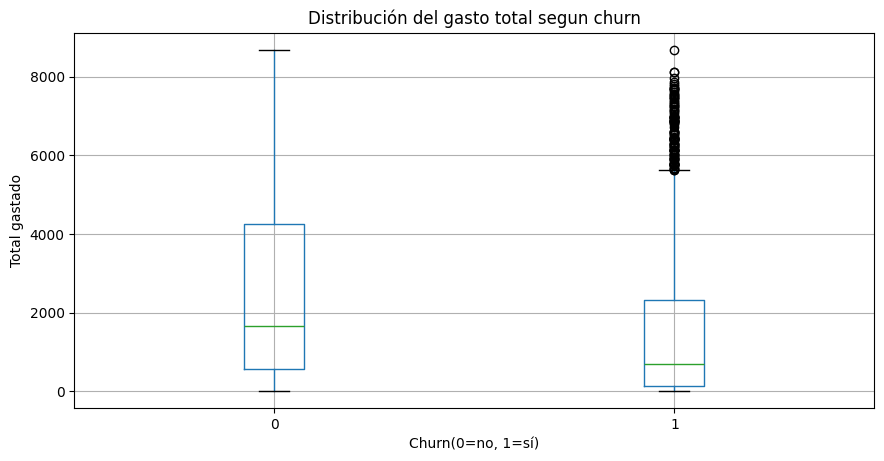

In [65]:
fig,ax = plt.subplots(figsize=(10,5))

df_copia.boxplot(column='Charges.Total',by='Churn',ax=ax)

ax.set_title('Distribución del gasto total segun churn')
ax.set_xlabel('Churn(0=no, 1=sí)')
ax.set_ylabel('Total gastado')
plt.suptitle('')
plt.show()

#####**Antiguedad de los clientes**

In [66]:
df_copia.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5398.0,37.321045,24.178367,0.0,14.0,37.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


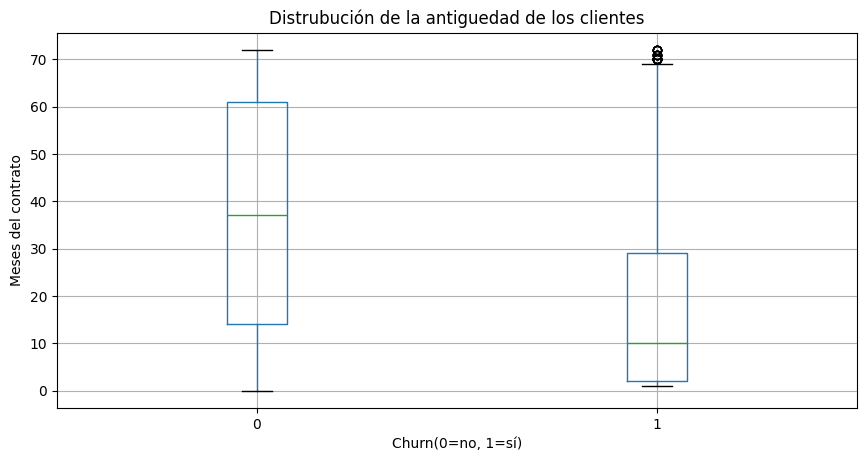

In [67]:
fig,ax = plt.subplots(figsize=(10,5))
df_copia.boxplot(column='tenure',by='Churn',ax=ax)

ax.set_title('Distrubución de la antiguedad de los clientes')
ax.set_xlabel('Churn(0=no, 1=sí)')
ax.set_ylabel('Meses del contrato')
plt.suptitle('')
plt.show()


###**Interpretación**

**Los clientes que evaden presentan una menor antiguedad y un gasto total significativamente inferior en comparación con aquellos que permanesieron en la empresa,Esto sugiere que los clientes con una menor permanencia tienden a cancelar sus servicios,especialmente en las etapas iniciales de contrato.**

#**INFORME**

**Este analisis tiene como objetivo comprender  el fenómeno de evasion de clientes(churn) en TelecomX**

La evasión ocurre cuando un cliente decide cancelar un servicio,lo que representa una perdida directa de ingresos.

Comprender los factores asociados al churn es fundamental para:

. Identificar patrones de comportamiento de clientes

. Detectar perfiles con mayor riesgo de evasión

.Proponer acciones estratégicas que  permitan reducir la tasa de evasiones

Este análisis se basa en datos históricos de clientes,incluyendo información demográfica,tipo dde contrato,servicios contratados y cargos asociados.


**1.Limpieza y tratameinto de datos**



**Se llevo a cabo un proceso de limpieza y preparación de los datos,con el fin de garantizar la calidad y consistencia**

**Pasos que se llevaron a cabo**

**.Carga de los datos desde una API en formato json,que fue normalizada y convertida en un DataFrame utilizando (pandas.json_normalize)**

**.Identificación de columnas con tipos de datos incorrectos,especialmente aquellas que contenian valores categóricos almacenados como (object)**

**.Conversion de variables binarias (Yes / No) a valores numericos (1 / 0) para fasilitar el analisis estadistico**

**.Tratamiento de valores especiales como (No internet service / No phone service),los cuales se interpretaron como ausencia del servicio (0)**


**.Conversion final de columnas relevantes a tipo (int),asegurando consistencia en el dataset**

**2.Analisis exploratorio de datos(EDA)**

**El analisis exploratorio se realizo con el objetivo de identificar patrones y relaciones entre las variables y la evasion de clientes**

**Analisis de la variable churn**

La variable churn fue analizada como una variable binaria

1 => cliente evadio
0 => cliente no evadio

**Se calculo la tasa de evasion mediante la media de la variable,lo que permitio conocer el porcentaje de clientes que cancelaron el cervicio**

**Se utilizo un gráfico de barras para analizar la distribución de clientes que si evadieron y los que no**

**Variables categoricas**

Se analizo como se distribuye la evasion segun variables como:

.tipo de contrato
.metodo de pado
.servicios adicionales
.facturizacion electronica

Estos análisis permitieron observar que ciertos perfiles de clientes presentan una mayor propensión a cancelar.


**3.Conclusiones e Insights**

A partir del análisis realizado, se pueden destacar los siguientes hallazgos:

Los clientes con menor antigüedad presentan una mayor tasa de evasión.

Los contratos mensuales están asociados a un mayor Churn en comparación con contratos de mayor duración.

La ausencia de servicios adicionales (seguridad, soporte técnico, streaming) se relaciona con una mayor probabilidad de cancelación.

Los clientes con menor gasto acumulado tienden a evadir con mayor frecuencia.

Estos insights permiten entender mejor el comportamiento de los clientes y detectar segmentos con alto riesgo de evasión.



**Recomendaciones**

**Con base a los resultados obtenidos,se proponen las siguientes recomendaciones**

.Insentivar contratos de mayor duracion mediante descuentos o beneficios

.Promover servicios especiales que aumenten el valor percivido por el cliente

.Utilizar estos datos como base para la construccion de modelos predictivos de evasion